In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
train = pd.read_csv('train.csv',dtype={"Age": np.float64})
test = pd.read_csv('test.csv',dtype={"Age": np.float64})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
PassengerId=test['PassengerId']
PassengerId.head()
all_data = pd.concat([train, test], ignore_index = True, sort=True)
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## 1. Data Visualization

#### 1) Sex Feature

Percentage of females who survived:74.204
Percentage of males who survived:18.891


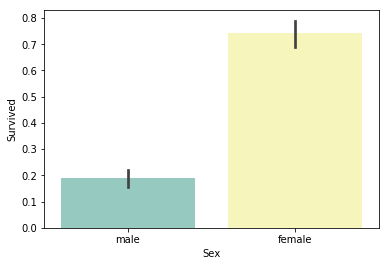

In [15]:
sns.barplot(x="Sex", y="Survived", data=train, palette='Set3')
train_female_survived = train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100
train_male_survived = train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100
print("Percentage of females who survived:%.3f" % (train_female_survived))
print("Percentage of males who survived:%.3f" % (train_male_survived))

#### 2) Pclass Feature   1 = 1st, 2 = 2nd, 3 = 3rd

Percentage of Pclass = 1 who survived:62.96
Percentage of Pclass = 2 who survived:47.28
Percentage of Pclass = 3 who survived:24.24


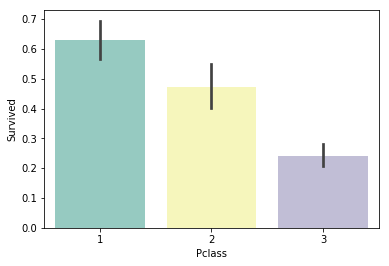

In [16]:
sns.barplot(x="Pclass", y="Survived", data=train, palette='Set3')
train_pclass1_survived = train["Survived"][train["Pclass"] == 1].value_counts(normalize=True)[1]*100
train_pclass2_survived = train["Survived"][train["Pclass"] == 2].value_counts(normalize=True)[1]*100
train_pclass3_survived = train["Survived"][train["Pclass"] == 3].value_counts(normalize=True)[1]*100

print("Percentage of Pclass = 1 who survived:%.2f" % (train_pclass1_survived))
print("Percentage of Pclass = 2 who survived:%.2f" % (train_pclass2_survived))
print("Percentage of Pclass = 3 who survived:%.2f" % (train_pclass3_survived))

#### 3) SibSp Feature (# of siblings / spouses aboard the Titanic)

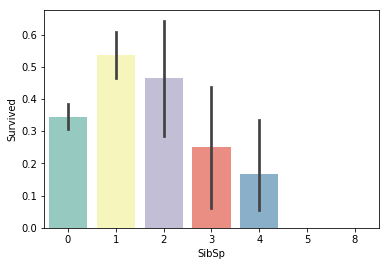

In [30]:
sns.barplot(x="SibSp", y="Survived", data=train, palette='Set3');


#### 4) Parch Feature  (of parents / children aboard the Titanic)

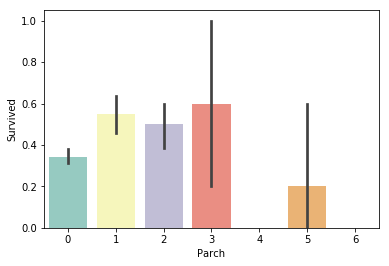

In [31]:
sns.barplot(x="Parch", y="Survived", data=train, palette='Set3');

#### 5) Age Feature

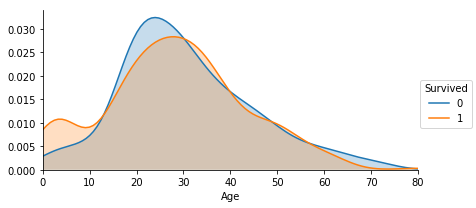

In [18]:
facet = sns.FacetGrid(train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend();

#### 6) Fare Feature  (Passenger fare)	

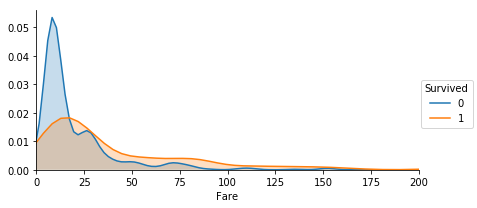

In [20]:
facet = sns.FacetGrid(train, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, 200))
facet.add_legend();

#### 7) Title Feature(New)

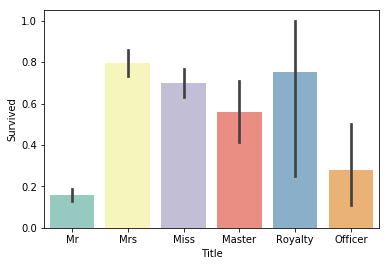

In [23]:
all_data['Title'] = all_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
all_data['Title'] = all_data['Title'].map(Title_Dict)
sns.barplot(x="Title", y="Survived", data=all_data, palette='Set3');

#### 8) FamilyLabel Feature (FamilySize=Parch+SibSp+1)

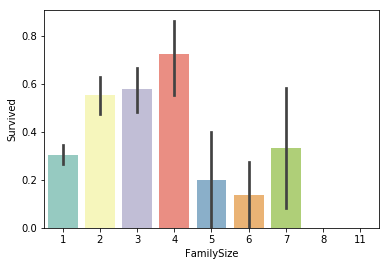

In [25]:
all_data['FamilySize']=all_data['SibSp']+all_data['Parch']+1
sns.barplot(x="FamilySize", y="Survived", data=all_data, palette='Set3');

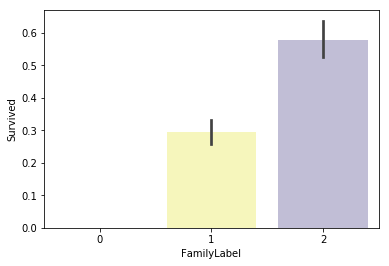

In [26]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
all_data['FamilyLabel']=all_data['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel", y="Survived", data=all_data, palette='Set3');

#### 9) Deck Feature (from cabin number)

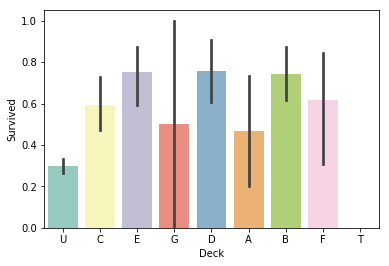

In [27]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data, palette='Set3');

#### 10) TicketGroup Feature

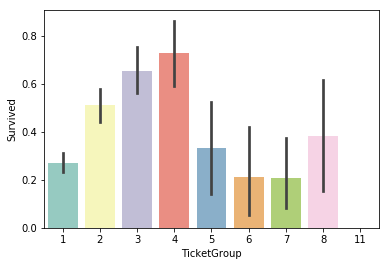

In [28]:
Ticket_Count = dict(all_data['Ticket'].value_counts())
all_data['TicketGroup'] = all_data['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x='TicketGroup', y='Survived', data=all_data, palette='Set3');

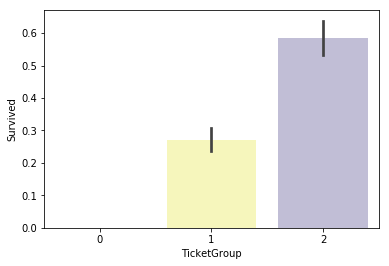

In [29]:
def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data, palette='Set3');

## 2. Data Cleaning

#### 1) Missing Value interpolation

##### Age Feature

In [34]:
age_df = all_data[['Age', 'Pclass','Sex','Title']]
age_df=pd.get_dummies(age_df)
age_df.head()

,Age,Pclass,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,22.0,3,0,1,0,0,1,0,0,0
1,38.0,1,1,0,0,0,0,1,0,0
2,26.0,3,1,0,0,1,0,0,0,0
3,35.0,1,1,0,0,0,0,1,0,0
4,35.0,3,0,1,0,0,1,0,0,0


In [46]:
known_age = age_df[age_df.Age.notnull()].values
unknown_age = age_df[age_df.Age.isnull()].values
len(unknown_age)

263

In [45]:
y = known_age[:, 0]
X = known_age[:, 1:]

In [47]:
# RandomForestRegressor -> Age Feature
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[ (all_data.Age.isnull()), 'Age' ] = predictedAges

##### Embarked Feature

In [48]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572,Miss,1,1,B,2
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572,Mrs,1,1,B,2


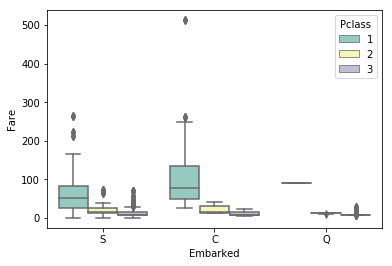

In [50]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass",data=all_data, palette="Set3");

In [51]:
all_data['Embarked'] = all_data['Embarked'].fillna('C')

##### Fare Feature

In [52]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,FamilyLabel,Deck,TicketGroup
1043,60.5,Unknown,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,Mr,1,1,U,1


In [53]:
# Median interpolate
fare=all_data[(all_data['Embarked'] == "S") & (all_data['Pclass'] == 3)].Fare.median()
all_data['Fare']=all_data['Fare'].fillna(fare)

#### 2) Same group recognition

In [55]:
import pprint
all_data['Surname']=all_data['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(all_data['Surname'].value_counts())
pprint.pprint(Surname_Count)

{'Abbing': 1,
 'Abbott': 3,
 'Abelseth': 2,
 'Abelson': 2,
 'Abrahamsson': 1,
 'Abrahim': 1,
 'Adahl': 1,
 'Adams': 1,
 'Ahlin': 1,
 'Aks': 2,
 'Albimona': 1,
 'Aldworth': 1,
 'Alexander': 1,
 'Alhomaki': 1,
 'Ali': 2,
 'Allen': 2,
 'Allison': 4,
 'Allum': 1,
 'Andersen': 1,
 'Andersen-Jensen': 1,
 'Anderson': 1,
 'Andersson': 11,
 'Andreasson': 1,
 'Andrew': 2,
 'Andrews': 2,
 'Angheloff': 1,
 'Angle': 2,
 'Appleton': 1,
 'Arnold-Franchi': 2,
 'Aronsson': 1,
 'Artagaveytia': 1,
 'Ashby': 1,
 'Asim': 1,
 'Asplund': 8,
 'Assaf': 1,
 'Assaf Khalil': 1,
 'Assam': 1,
 'Astor': 2,
 'Attalah': 2,
 'Aubart': 1,
 'Augustsson': 1,
 'Ayoub': 1,
 'Baccos': 1,
 'Backstrom': 2,
 'Baclini': 4,
 'Badman': 1,
 'Badt': 1,
 'Bailey': 1,
 'Baimbrigge': 1,
 'Balkic': 1,
 'Ball': 1,
 'Banfield': 1,
 'Barah': 1,
 'Barbara': 2,
 'Barber': 1,
 'Barkworth': 1,
 'Barry': 1,
 'Barton': 1,
 'Bateman': 1,
 'Baumann': 1,
 'Baxter': 2,
 'Bazzani': 1,
 'Beane': 2,
 'Beattie': 1,
 'Beauchamp': 1,
 'Beavan': 1,
 'Becke

In [56]:
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=12) | (all_data['Sex']=='female'))]
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) & (all_data['Sex']=='male')]

In [57]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child

,GroupCount
1.000000,115
0.000000,31
0.750000,2
0.333333,1
0.142857,1


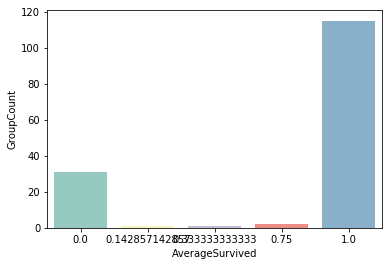

In [58]:
# Female_Child Group always all survived or not
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"], palette='Set3').set_xlabel('AverageSurvived');

          GroupCount
0.000000         122
1.000000          20
0.500000           6
0.333333           2
0.250000           1


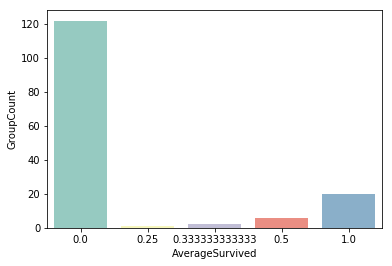

In [60]:
# Male_Adult Group always all survived or not
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
print(Male_Adult)
sns.barplot(x=Male_Adult.index, y=Male_Adult['GroupCount'], palette='Set3').set_xlabel('AverageSurvived');


In [61]:
# abnormal group -> Female_Child_Group all dead
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)

{'Lahtinen', 'Attalah', 'Turpin', 'Boulos', 'Lefebre', 'Barbara', 'Jussila', 'Robins', 'Rosblom', 'Zabour', 'Lobb', 'Sage', 'Goodwin', 'Panula', 'Van Impe', 'Ford', 'Palsson', 'Canavan', 'Ilmakangas', 'Strom', 'Johnston', 'Olsson', 'Bourke', 'Skoog', 'Danbom', 'Rice', 'Oreskovic', 'Arnold-Franchi', 'Caram', 'Cacic', 'Vander Planke'}


In [62]:
# abnormal group -> Male_Adult_Group all survived
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Kimball', 'Cardeza', 'Jonsson', 'Taylor', 'Dick', 'Duff Gordon', 'McCoy', 'Daly', 'Frolicher-Stehli', 'Goldenberg', 'Chambers', 'Frauenthal', 'Harder', 'Nakid', 'Greenfield', 'Jussila', 'Beckwith', 'Bishop', 'Bradley', 'Beane'}


In [63]:
# Modified the abnormal group
train=all_data.loc[all_data['Survived'].notnull()]
test=all_data.loc[all_data['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

/Users/chauncey_chen/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### 3) Feature Transformation

In [64]:
all_data=pd.concat([train, test])
all_data=all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data=pd.get_dummies(all_data)
train=all_data[all_data['Survived'].notnull()]
test=all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)
X = train.values[:,1:]
y = train.values[:,0]

## 3. Build Model and Optimization

##### Grid Search

In [66]:
import warnings
warnings.filterwarnings('ignore')

pipe=Pipeline([('select',SelectKBest(k=20)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='roc_auc', cv=10)
gsearch.fit(X,y)
print(gsearch.best_params_, gsearch.best_score_)

{'classify__max_depth': 6, 'classify__n_estimators': 42} 0.88109635084


##### Train the model

In [67]:
select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

Pipeline(memory=None,
     steps=[('selectkbest', SelectKBest(k=20, score_func=<function f_classif at 0x10e889bf8>)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, ...estimators=26, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=True))])

##### Cross-Validation

In [69]:
# from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(pipeline, X, y, cv= 10)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

CV Score : Mean - 0.8451402 | Std - 0.03276752 


In [70]:
predictions = pipeline.predict(test)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("submission.csv", index=False)